In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [7]:
df

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-04-01,1,address_0,product_0,4
1,2018-04-01,1,address_0,product_1,4
2,2018-04-01,1,address_0,product_2,5
3,2018-04-01,1,address_0,product_3,10
4,2018-04-01,1,address_0,product_4,2
...,...,...,...,...,...
301350,NaT,5,address_173,product_15,0
301351,NaT,5,address_173,product_17,1
301352,NaT,5,address_173,product_18,1
301353,NaT,5,address_173,product_19,0


Проверяем формат столбцов

In [6]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

Вывести несколько первых строк сгруппированных данных

In [9]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-02,1521
1,2018-01-03,1387
2,2018-01-04,1455
3,2018-01-05,1481
4,2018-01-06,1467


Нарисуйте график продаж у `grouped_df`

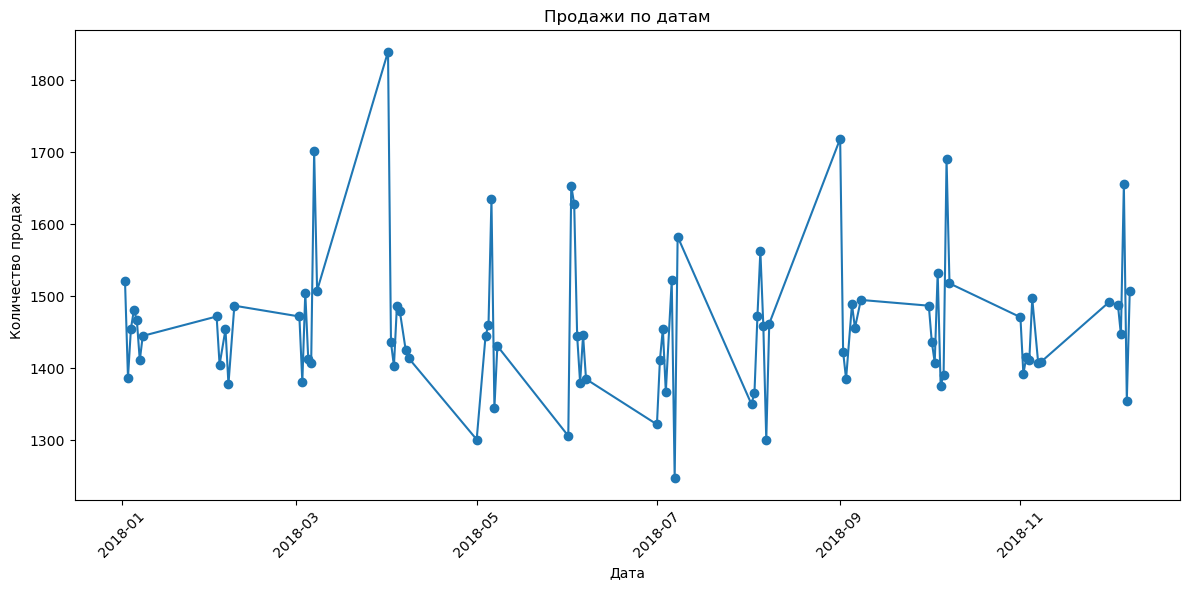

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество продаж'], marker='o', linestyle='-')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

График демонстрирует волнообразную динамику продаж: периодически наблюдаются резкие всплески, особенно в марте и сентябре, когда количество продаж превышает 1800. В то же время заметны и провалы, например, летом — вероятно, из-за сезона отпусков. Продажи колеблются, что может быть связано с днями недели, акциями или внешними событиями. В целом, тренд стабильный — без выраженного роста или снижения за весь период.


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')
Q1 = grouped_df['Количество продаж'].quantile(0.25)
Q3 = grouped_df['Количество продаж'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = grouped_df[(grouped_df['Количество продаж'] < lower_bound) | (grouped_df['Количество продаж'] > upper_bound)]
max_outlier = outliers[outliers['Количество продаж'] == outliers['Количество продаж'].max()]

In [12]:
max_outlier

,Дата,Количество продаж
19,2018-04-01,1840


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [20]:
filtered_df = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) & 
    (df['Дата'].dt.weekday == 2) &  
    (df['Склад'] == 3)  
]

grouped_df = filtered_df.groupby('Номенклатура')['Количество'].sum().reset_index()

top_product = grouped_df.loc[grouped_df['Количество'].idxmax()]

print("Топовый товар по продажам:")
print(top_product)

Топовый товар по продажам:
Номенклатура    product_1
Количество            479
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [110]:
weather = pd.read_csv(
    'weather2.csv',
    skiprows=6,
    sep=';',
    quotechar='"',
    engine='python',
    index_col=0
)


In [111]:
weather.index = pd.to_datetime(weather.index, dayfirst=True, errors='coerce')
weather['date'] = weather.index.normalize()

In [112]:
daily_avg = (
    weather
    .groupby('date')['T']
    .mean()
    .reset_index(name='T')
)


In [113]:
sales = pd.read_csv(
    'data.csv',
    sep=',',              
    parse_dates=['Дата'],
    dayfirst=False        
)
sales['date'] = sales['Дата'].dt.normalize()

sales_daily = (
    sales
    .groupby('date')['Количество']
    .sum()
    .reset_index(name='Количество')
)

In [114]:
merged = pd.merge(sales_daily, daily_avg, on='date', how='inner')

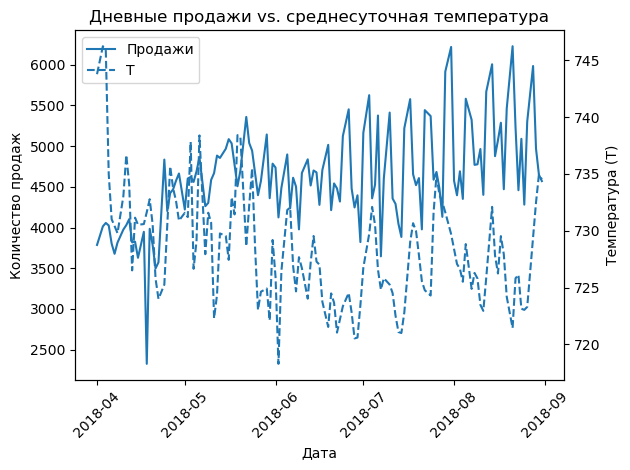

In [115]:
fig, ax1 = plt.subplots()
ax1.plot(merged['date'], merged['Количество'], label='Продажи')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(merged['date'], merged['T'], linestyle='--', label='T')
ax2.set_ylabel('Температура (T)')


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

plt.title('Дневные продажи vs. среднесуточная температура')
plt.tight_layout()
plt.show()

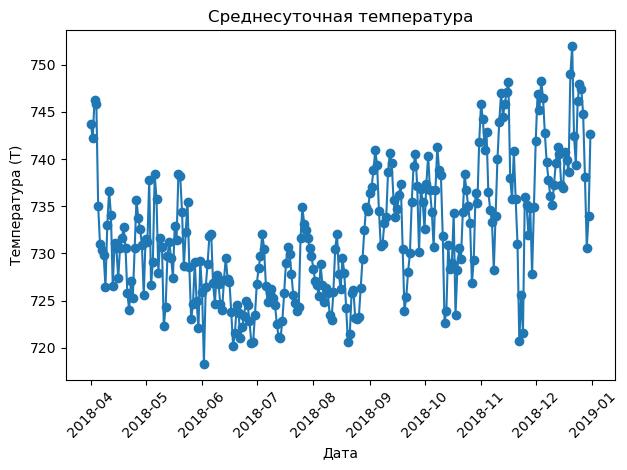

In [116]:
plt.figure()
plt.plot(daily_avg['date'], daily_avg['T'], marker='o')
plt.xlabel('Дата')
plt.ylabel('Температура (T)')
plt.title('Среднесуточная температура')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()